In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import random
import os
import glob
sns.set_style('white')

%matplotlib inline

plt.rcParams.update({'font.size': 14})

In [ ]:
# Load data
tennis_df = pd.read_csv('C:/Users/HP/Downloads/ATP.csv',
                        dtype=str)



In [ ]:
# Convert numerical values to float
numeric_columns = ['w_ace', 'l_ace', 'w_df', 'l_df', 'w_bpSaved', 'l_bpSaved', 'winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht', 'w_svpt', 'l_svpt', 'minutes']
tennis_df[numeric_columns] = tennis_df[numeric_columns].astype(float)

In [ ]:
tennis_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create new columns storing year and year/month attributes
tennis_df['tourney_yearmonth'] = tennis_df.tourney_date.astype(str).str[:6]
tennis_df['tourney_year'] = tennis_df.tourney_date.astype(str).str[:4]
tennis_df['tourney_year'] = tennis_df['tourney_year'].astype(int)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


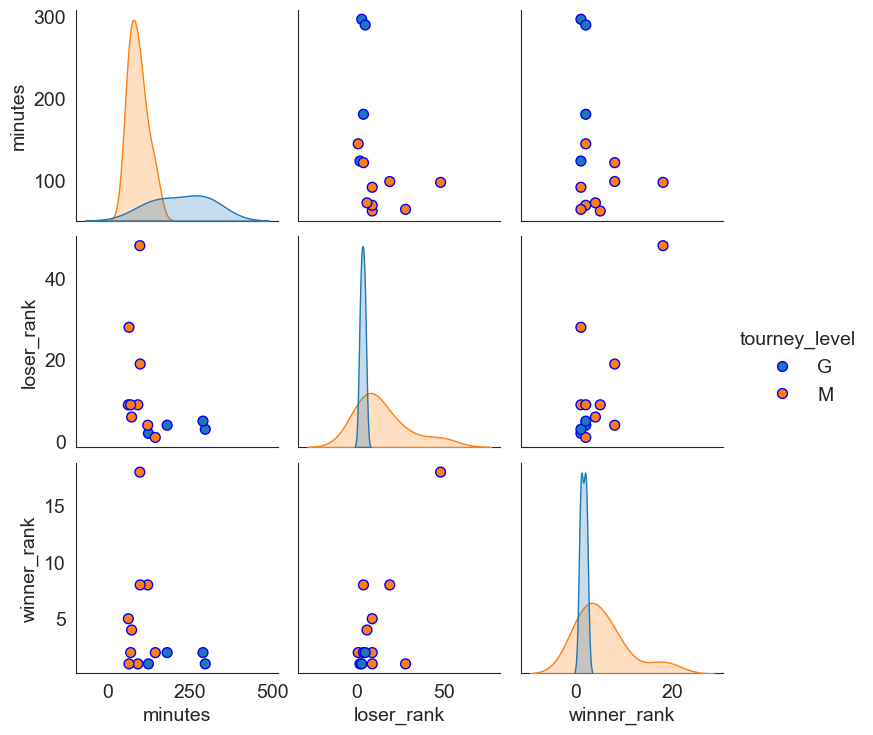

In [ ]:
# Use pairplot to draw multiple variables at once
df_pp = tennis_df[tennis_df['tourney_year'].between(2010,2019)&tennis_df['tourney_level'].isin(['M','G'])&tennis_df['round'].isin(['F'])][['minutes','loser_rank','winner_rank','tourney_level']].dropna()
sns.pairplot(df_pp, hue='tourney_level',diag_kind="kde", plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

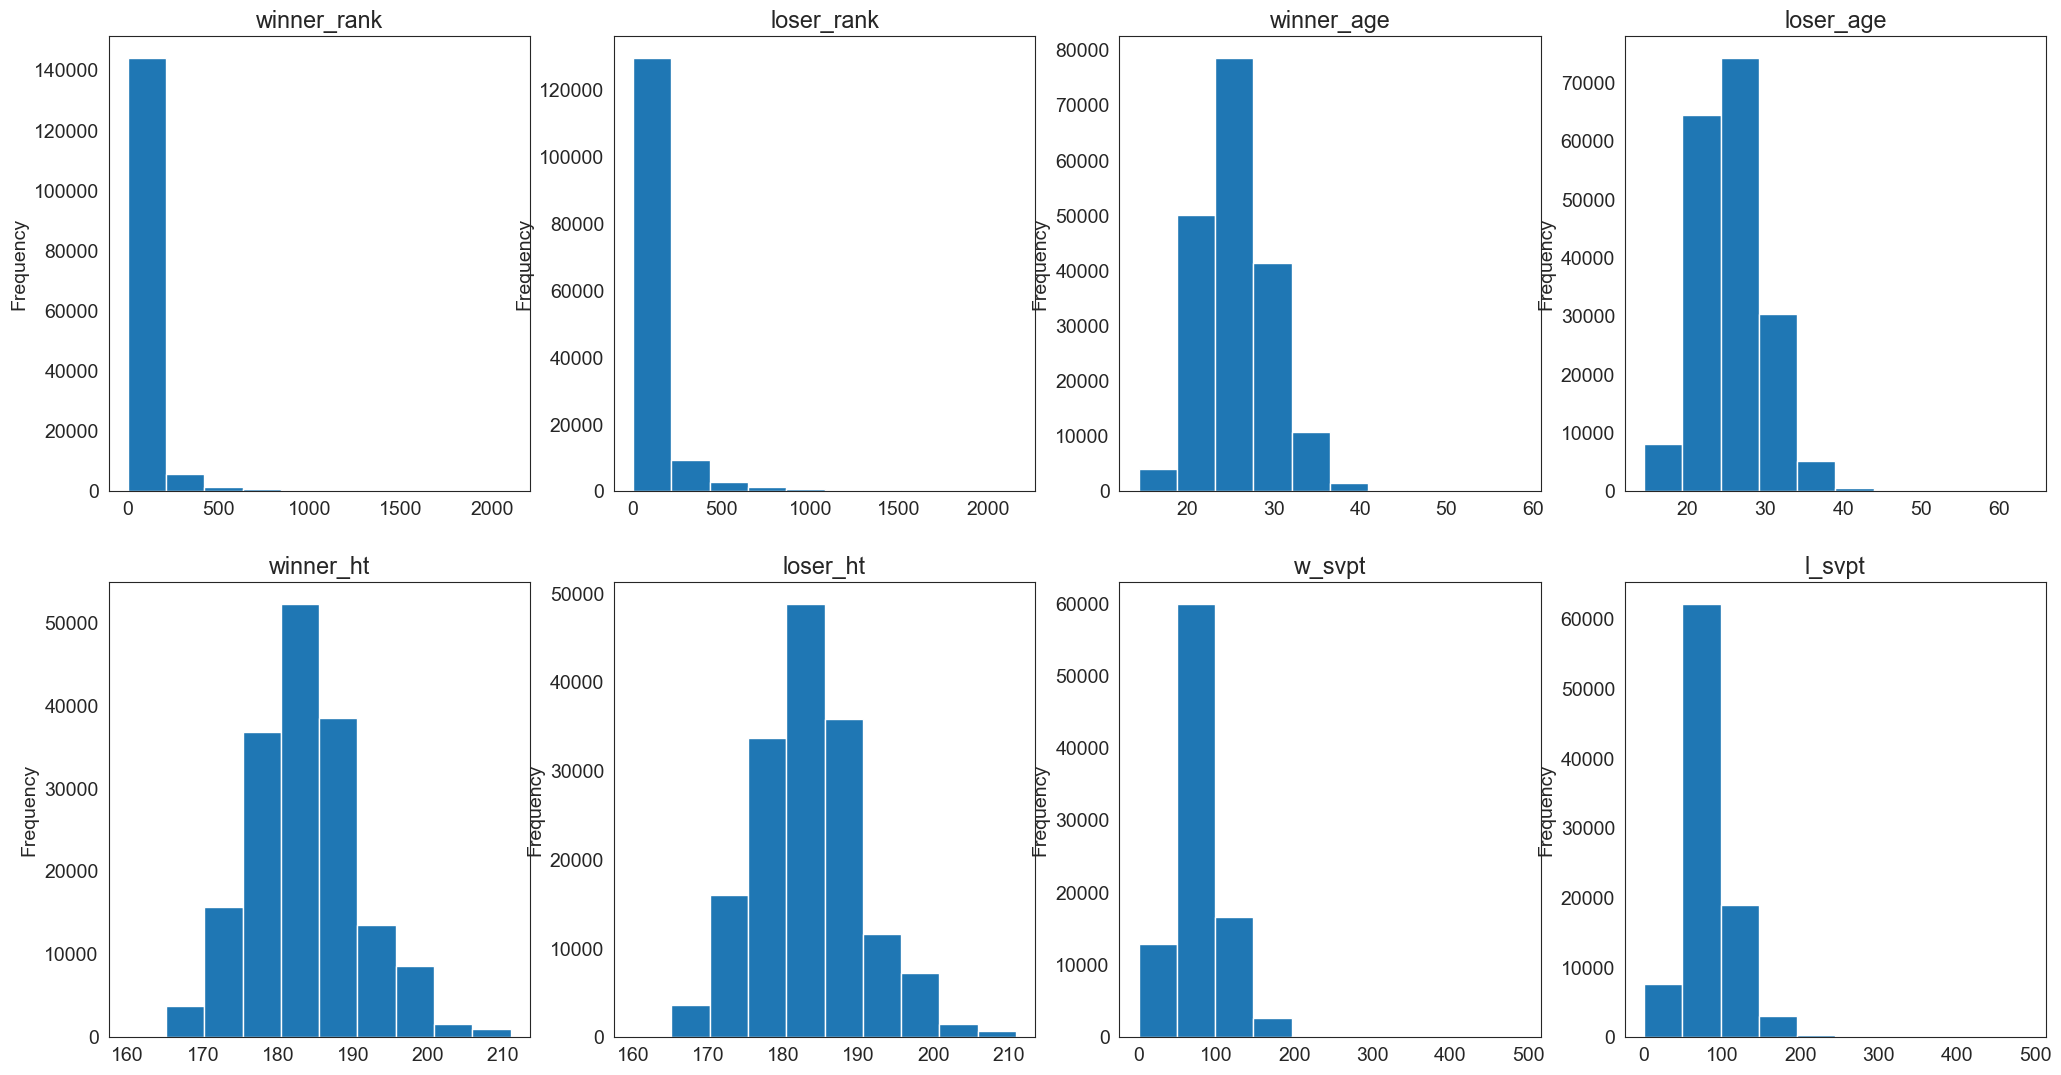

In [ ]:
dimensions = ['winner_rank','loser_rank','winner_age','loser_age','winner_ht','loser_ht','w_svpt','l_svpt']

plt.figure(1, figsize=(25,13))

for i in range(1,9):
    plt.subplot(2,4,i)
    tennis_df[dimensions[i-1]].plot(kind='hist', title=dimensions[i-1])

[Text(0.5, 0, 'Surface'), Text(0, 0.5, 'Aces')]

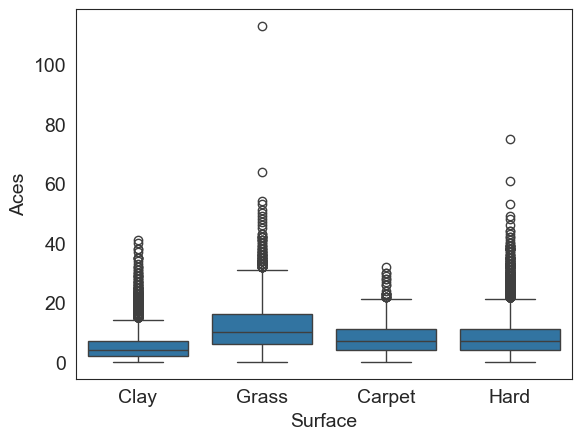

In [ ]:
tennis_df_h = tennis_df[tennis_df['tourney_level'].astype(str).isin(['G','M'])].copy()
tennis_df_h['w_ace'] = tennis_df_h['w_ace'].astype(float)
g = sns.boxplot(x="surface", y="w_ace", data=tennis_df_h)
g.set(xlabel='Surface', ylabel='Aces')

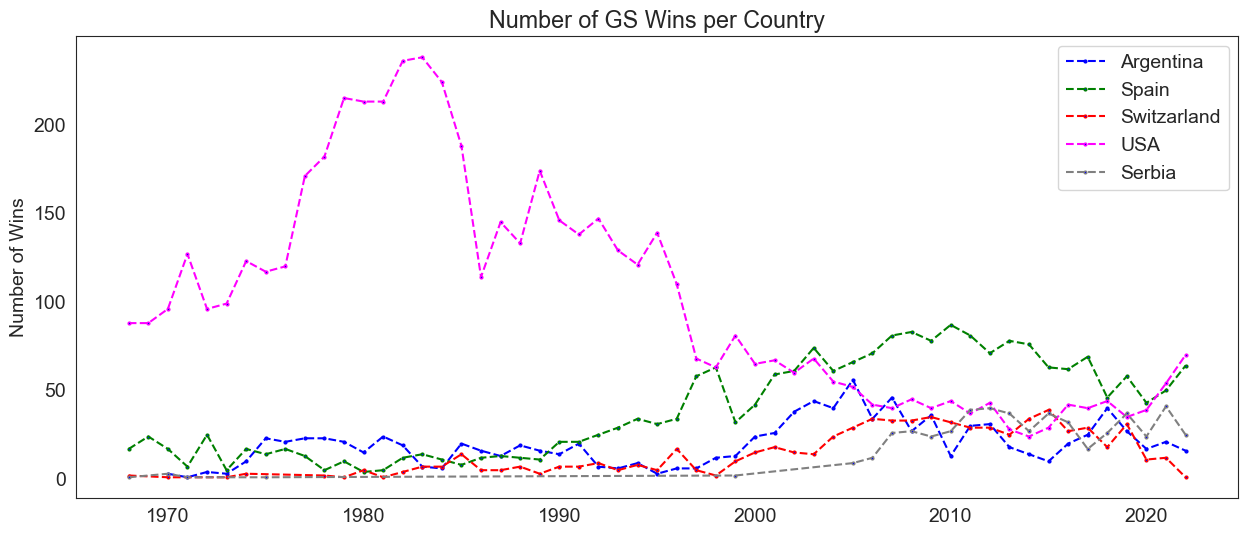

In [ ]:

fig, ax = plt.subplots(figsize=(15, 6))

s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin(['ARG']))].groupby(['tourney_year','winner_ioc']).agg('count')
plt.plot(s['tourney_id'].index.get_level_values(0), s['tourney_id'].values, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2, label='Argentina')

s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin(['ESP']))].groupby(['tourney_year','winner_ioc']).agg('count')
plt.plot(s['tourney_id'].index.get_level_values(0), s['tourney_id'].values, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2, label='Spain')

s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin(['SUI']))].groupby(['tourney_year','winner_ioc']).agg('count')
ax.plot(s['tourney_id'].index.get_level_values(0), s['tourney_id'].values, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2, label='Switzarland')

s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin(['USA']))].groupby(['tourney_year','winner_ioc']).agg('count')
ax.plot(s['tourney_id'].index.get_level_values(0), s['tourney_id'].values, color='magenta', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2, label='USA')

s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin(['SRB']))].groupby(['tourney_year','winner_ioc']).agg('count')
ax.plot(s['tourney_id'].index.get_level_values(0), s['tourney_id'].values, color='grey', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2, label='Serbia')

#labels = s.index.get_level_values(0)

ax.set_ylabel('Number of Wins')
ax.set_title('Number of GS Wins per Country')
#ax.set_xticklabels(labels)
ax.legend()

<Axes: title={'center': 'Players with most Aces'}, ylabel='Player'>

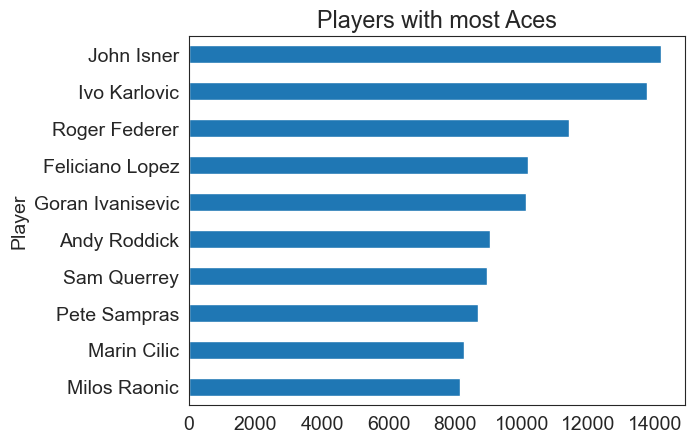

In [ ]:
sw = tennis_df.groupby(['winner_name']).agg({'w_ace':'sum'}).fillna(0).sort_values(['w_ace'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_ace':'sum'}).fillna(0).sort_values(['l_ace'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs, sort=False).reset_index().fillna(0)
r['aces'] = r['l_ace']+r['w_ace']
final = r.groupby('index').agg({'aces':'sum'}).sort_values('aces',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','Aces']
final = final.sort_values('Aces',ascending=True)
final.plot('Player','Aces', kind='barh', title='Players with most Aces', legend=False)


<Axes: title={'center': 'Players with most Double Faults'}, ylabel='Player'>

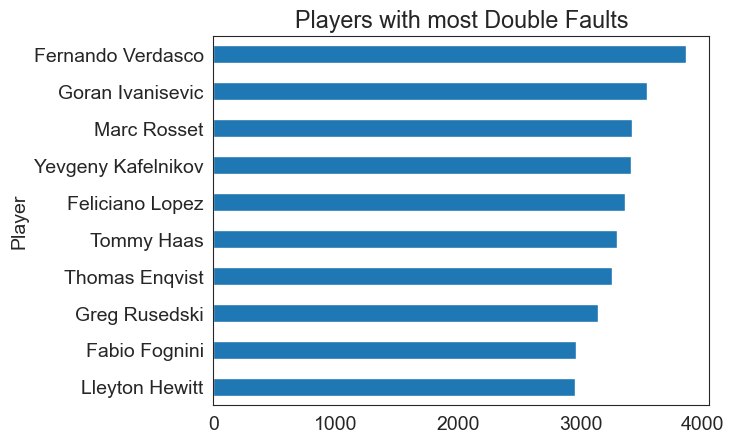

In [ ]:
sw = tennis_df.groupby(['winner_name']).agg({'w_df':'sum'}).fillna(0).sort_values(['w_df'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_df':'sum'}).fillna(0).sort_values(['l_df'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs, sort=False).reset_index().fillna(0)
r['dfs'] = r['l_df']+r['w_df']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','DoubleFaults']
final = final.sort_values('DoubleFaults',ascending=True)
final.plot('Player','DoubleFaults', kind='barh', title='Players with most Double Faults', legend=False)

<Axes: title={'center': 'Players with most BP saved'}, ylabel='Player'>

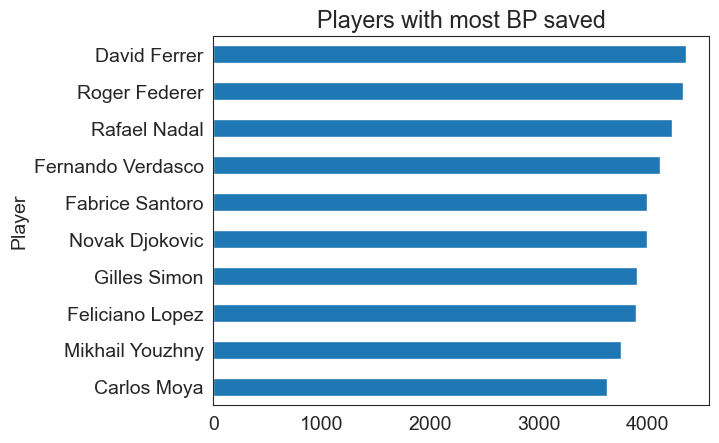

In [ ]:
sw = tennis_df.groupby(['winner_name']).agg({'w_bpSaved':'sum'}).fillna(0).sort_values(['w_bpSaved'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_bpSaved':'sum'}).fillna(0).sort_values(['l_bpSaved'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs, sort=False).reset_index().fillna(0)
r['dfs'] = r['l_bpSaved']+r['w_bpSaved']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','BreakPointsSaved']
final = final.sort_values('BreakPointsSaved',ascending=True)
final.plot('Player','BreakPointsSaved', kind='barh', title='Players with most BP saved', legend=False)

<Axes: title={'center': 'Unique # of Players that Won GS and Masters Finals'}, xlabel='Year'>

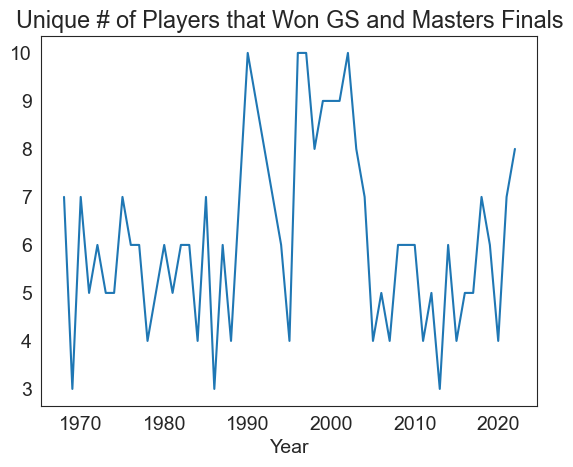

In [ ]:
# Unique number of tournament winner per year from 2000 to 2016 (show dominance of top players)
s = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))].groupby(['tourney_year']).agg({'winner_name':'nunique'})
t= s.reset_index()
t.columns=['Year','Unique_Winners']
t.plot('Year', 'Unique_Winners', title='Unique # of Players that Won GS and Masters Finals', legend=False)

<Axes: title={'center': 'Unique # of Players that Won GS and Masters Finals'}, xlabel='Year_Range'>

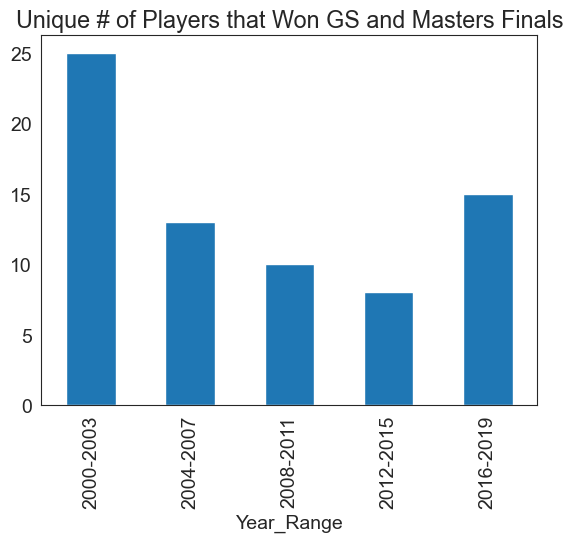

In [ ]:

# Unique number of tournament winner per year from 2000 to 2016 (show dominance of top players)
s = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))&(tennis_df['tourney_year'].between(2000,2003))].agg({'winner_name':'nunique'})
t = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))&(tennis_df['tourney_year'].between(2004,2007))].agg({'winner_name':'nunique'})
u = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))&(tennis_df['tourney_year'].between(2008,2011))].agg({'winner_name':'nunique'})
v = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))&(tennis_df['tourney_year'].between(2012,2015))].agg({'winner_name':'nunique'})
w = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))&(tennis_df['tourney_year'].between(2016,2019))].agg({'winner_name':'nunique'})

s['2000-2003'] = s['winner_name']
s=s.drop('winner_name')
t['2004-2007'] = t['winner_name']
t=t.drop('winner_name')
u['2008-2011'] = u['winner_name']
u=u.drop('winner_name')
v['2012-2015'] = v['winner_name']
v=v.drop('winner_name')
w['2016-2019'] = w['winner_name']
w=w.drop('winner_name')

dfl = [s,t,u,v,w]
dfs = pd.concat(dfl)
x=pd.DataFrame(dfs, columns=['Unique_Count']).reset_index()
x.columns=['Year_Range','Unique_Winners']
x.plot('Year_Range', 'Unique_Winners', kind='bar', title='Unique # of Players that Won GS and Masters Finals', legend=False)

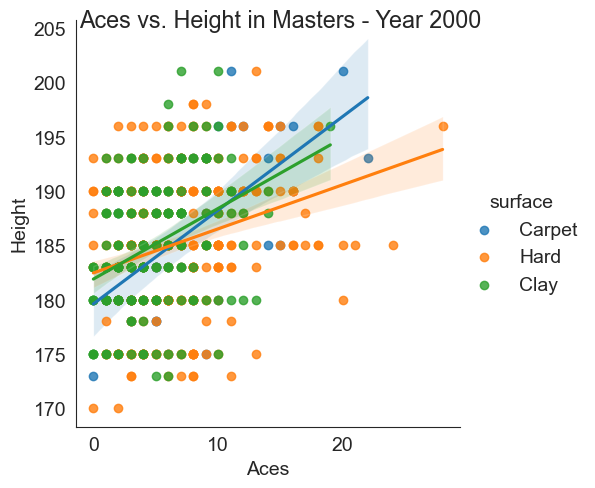

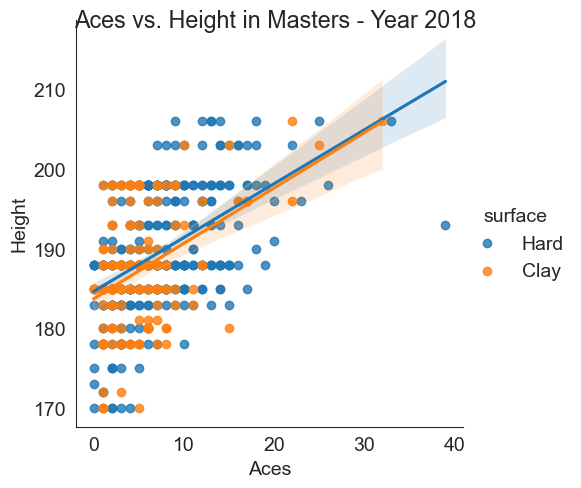

In [ ]:
g1 = sns.lmplot(x='w_ace', y='winner_ht', hue='surface', fit_reg=True, data=tennis_df[(tennis_df['tourney_level'].isin(['M']))&(tennis_df['tourney_year']==2000)])
g1.fig.suptitle('Aces vs. Height in Masters - Year 2000')
g1.set(xlabel='Aces', ylabel='Height')

g2 = sns.lmplot(x='w_ace', y='winner_ht', hue='surface', fit_reg=True, data=tennis_df[(tennis_df['tourney_level'].isin(['M']))&(tennis_df['tourney_year']==2018)])
g2.fig.suptitle('Aces vs. Height in Masters - Year 2018')
g2.set(xlabel='Aces', ylabel='Height')

Initial DataFrame columns: Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'tourney_yearmonth', 'tourney_year'],
      dtype='object')
Sample data:
   tourney_id tourney_name surface draw_size tourney_level tourney_date  \
0  1968-2029       Dublin   Grass        32             A     19680708   
1  1968-2029       Dublin   Grass        32      

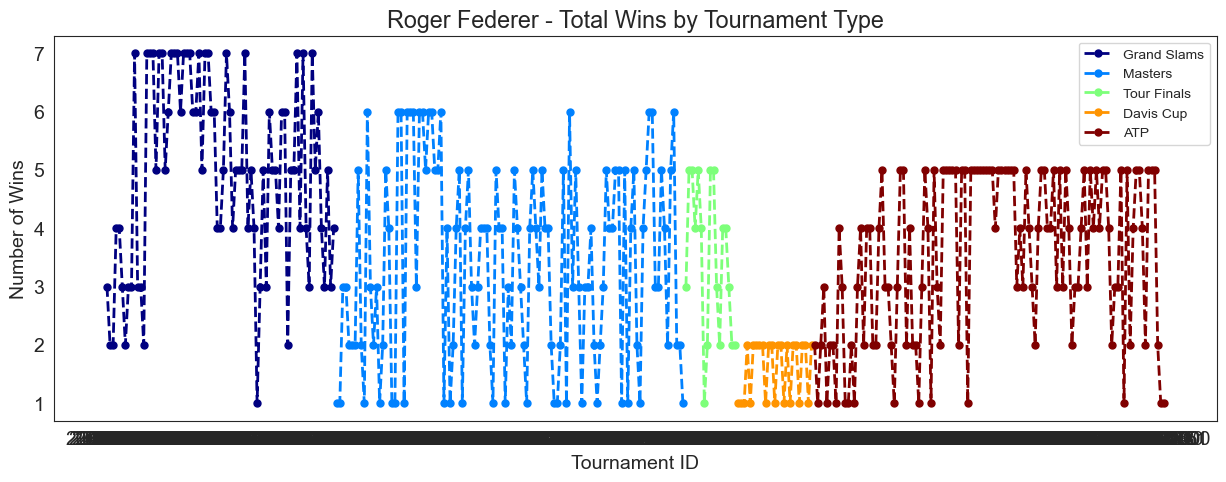

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check initial DataFrame structure
print("Initial DataFrame columns:", tennis_df.columns)
print("Sample data:\n", tennis_df.head())

# Filter the DataFrame for Roger Federer's wins and group by tournament ID and level
pldf_1 = tennis_df[tennis_df['winner_name'] == 'Roger Federer']\
    .groupby(['tourney_id', 'tourney_level'], as_index=False)\
    .agg(wins=('tourney_id', 'count'))  # Count the number of wins, naming the new column 'wins'

# Print the aggregated DataFrame to check its structure
print("Aggregated DataFrame:\n", pldf_1)

# Sort values by tournament ID
pldf_2 = pldf_1.sort_values(by=['tourney_id'])

# Print the sorted DataFrame to confirm the changes
print("Sorted DataFrame:\n", pldf_2)

# Prepare the plot
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Roger Federer - Total Wins by Tournament Type')
plt.ylabel('Number of Wins')
plt.xlabel('Tournament ID')

# List of tournament levels to plot
tournament_levels = ['G', 'M', 'F', 'D', 'A']
for level in tournament_levels:
    level_data = pldf_2[pldf_2['tourney_level'] == level]
    if not level_data.empty:
        plt.plot(level_data['tourney_id'], level_data['wins'],
                 linestyle='dashed', marker='o', markersize=5, linewidth=2, label=level)

# Set the legend
plt.legend(['Grand Slams', 'Masters', 'Tour Finals', 'Davis Cup', 'ATP'], loc='upper right', prop={'size': 10})

# Show the plot
plt.show()



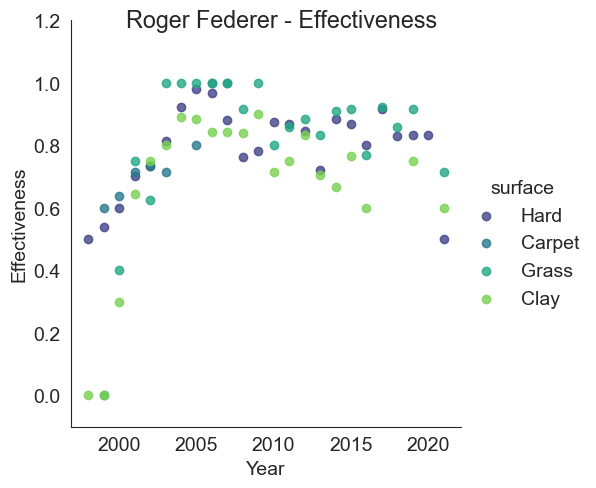

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming tennis_df is your DataFrame containing the relevant data.

# Group by and aggregate wins for Roger Federer
pww = tennis_df[tennis_df['winner_name'] == 'Roger Federer']\
    .groupby(['tourney_year', 'surface'], as_index=False)\
    .agg({'tourney_id': 'count'})
pww.columns = ['tourney_year', 'surface', 'wins']

# Group by and aggregate losses for Roger Federer
pll = tennis_df[tennis_df['loser_name'] == 'Roger Federer']\
    .groupby(['tourney_year', 'surface'], as_index=False)\
    .agg({'tourney_id': 'count'})
pll.columns = ['tourney_year', 'surface', 'loses']

# Concatenate the results
dfs_concat = pd.concat([pww, pll], sort=False)

# Fill NaNs and group by tourney_year and surface
dfs_final = dfs_concat.fillna(0)\
    .groupby(['tourney_year', 'surface'])\
    .agg({'wins': 'sum', 'loses': 'sum'})\
    .reset_index()

# Calculate effectiveness
dfs_final['r_eff'] = np.where(dfs_final['loses'] > 0,
                               dfs_final['wins'] / (dfs_final['wins'] + dfs_final['loses']), 1)

# Convert tourney_year to integer
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

# Plot the effectiveness
g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard', 'Carpet', 'Grass', 'Clay'])
g.fig.suptitle('Roger Federer - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1, 1.2))

# Show the plot
plt.show()


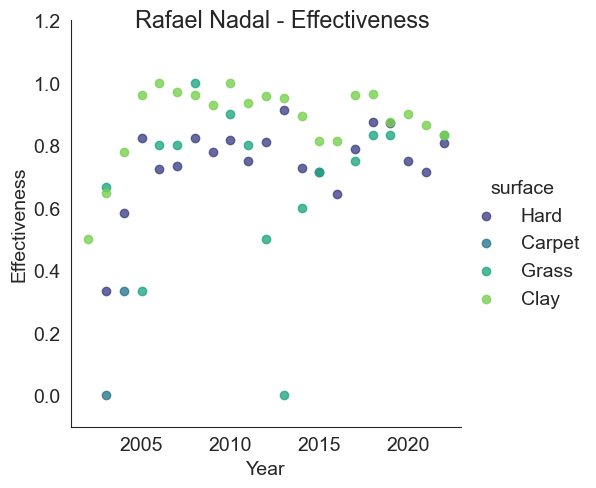

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming tennis_df is your DataFrame containing the relevant data.

# Group by and aggregate wins for Rafael Nadal
pww = tennis_df[tennis_df['winner_name'] == 'Rafael Nadal']\
    .groupby(['tourney_year', 'surface'], as_index=False)\
    .agg({'tourney_id': 'count'})
pww.columns = ['tourney_year', 'surface', 'wins']

# Group by and aggregate losses for Rafael Nadal
pll = tennis_df[tennis_df['loser_name'] == 'Rafael Nadal']\
    .groupby(['tourney_year', 'surface'], as_index=False)\
    .agg({'tourney_id': 'count'})
pll.columns = ['tourney_year', 'surface', 'loses']

# Concatenate the results
dfs_concat = pd.concat([pww, pll], sort=False)

# Fill NaNs and group by tourney_year and surface
dfs_final = dfs_concat.fillna(0)\
    .groupby(['tourney_year', 'surface'])\
    .agg({'wins': 'sum', 'loses': 'sum'})\
    .reset_index()

# Calculate effectiveness
dfs_final['r_eff'] = np.where(dfs_final['loses'] > 0,
                               dfs_final['wins'] / (dfs_final['wins'] + dfs_final['loses']), 1)

# Convert tourney_year to integer
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

# Plot the effectiveness
g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard', 'Carpet', 'Grass', 'Clay'])
g.fig.suptitle('Rafael Nadal - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1, 1.2))

# Show the plot
plt.show()


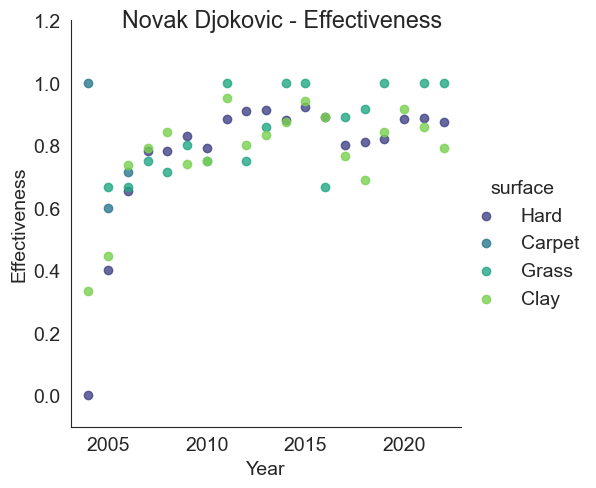

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming tennis_df is your DataFrame containing the relevant data.

# Group by and aggregate wins for Novak Djokovic
pww = tennis_df[tennis_df['winner_name'] == 'Novak Djokovic']\
    .groupby(['tourney_year', 'surface'], as_index=False)\
    .agg({'tourney_id': 'count'})
pww.columns = ['tourney_year', 'surface', 'wins']

# Group by and aggregate losses for Novak Djokovic
pll = tennis_df[tennis_df['loser_name'] == 'Novak Djokovic']\
    .groupby(['tourney_year', 'surface'], as_index=False)\
    .agg({'tourney_id': 'count'})
pll.columns = ['tourney_year', 'surface', 'loses']

# Concatenate the results
dfs_concat = pd.concat([pww, pll], sort=False)

# Fill NaNs and group by tourney_year and surface
dfs_final = dfs_concat.fillna(0)\
    .groupby(['tourney_year', 'surface'])\
    .agg({'wins': 'sum', 'loses': 'sum'})\
    .reset_index()

# Calculate effectiveness
dfs_final['r_eff'] = np.where(dfs_final['loses'] > 0,
                               dfs_final['wins'] / (dfs_final['wins'] + dfs_final['loses']), 1)

# Convert tourney_year to integer
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

# Plot the effectiveness
g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard', 'Carpet', 'Grass', 'Clay'])
g.fig.suptitle('Novak Djokovic - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1, 1.2))

# Show the plot
plt.show()


([<matplotlib.axis.XTick at 0x1cbc101c4d0>,
 [Text(1968, 0, '1968'),
  Text(1973, 0, '1973'),
  Text(1978, 0, '1978'),
  Text(1983, 0, '1983'),
  Text(1988, 0, '1988'),
  Text(1993, 0, '1993'),
  Text(1998, 0, '1998'),
  Text(2003, 0, '2003'),
  Text(2008, 0, '2008'),
  Text(2013, 0, '2013'),
  Text(2018, 0, '2018')])

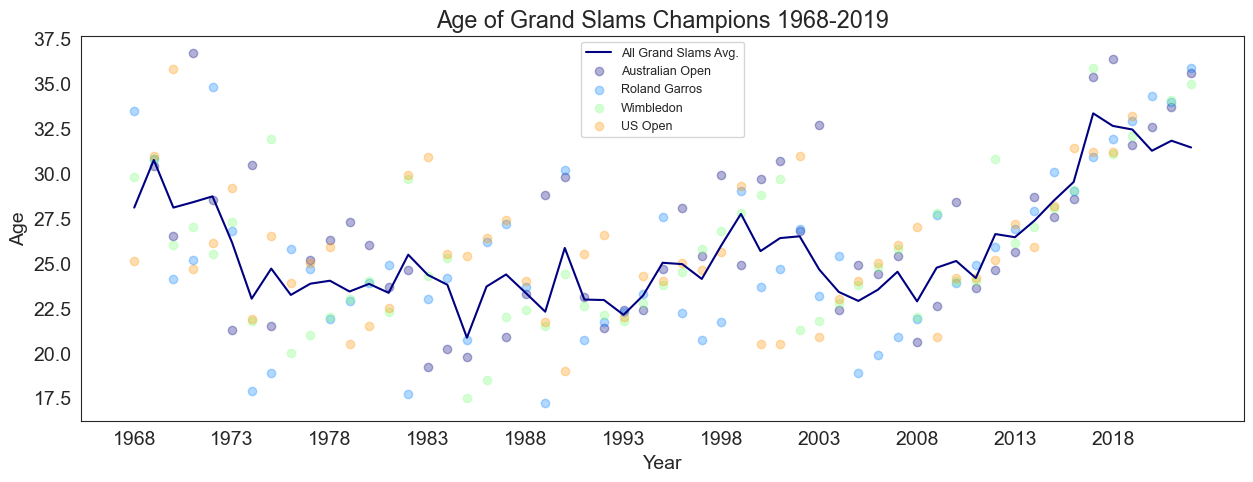

In [ ]:
# What is the average age of Grand Slams' players from 1968 up to 2019?
tennis_df_win=tennis_df[tennis_df['tourney_level'].isin(['G'])&(tennis_df['round']=='F')].dropna(subset=['winner_age'])
dfw = tennis_df_win[['tourney_year','tourney_name','winner_name','winner_age']]
dfw.columns = ['tourney_year','tourney_name','player','age']

dfs_final = dfw.groupby(['tourney_year','tourney_name']).agg({'age':'mean'}).reset_index()
dfs_final_2 = dfs_final.groupby(['tourney_year']).agg({'age':'mean'}).reset_index()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Age of Grand Slams Champions 1968-2019')
plt.ylabel('Age')
plt.xlabel('Year')

plt.plot(dfs_final_2['tourney_year'], dfs_final_2['age'])
plt.scatter(dfs_final[dfs_final['tourney_name']=='Australian Open']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Australian Open']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='Roland Garros']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Roland Garros']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='Wimbledon']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Wimbledon']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='US Open']['tourney_year'], dfs_final[dfs_final['tourney_name']=='US Open']['age'], alpha=0.3)

plt.legend(['All Grand Slams Avg.','Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'], loc='upper center',prop={'size': 9})
plt.xticks(np.arange(1968, 2019, 5), np.arange(1968, 2019, 5))
